#  Reduced particle densities

[Reduced particle densities](sec:reduced_densities) associated with the [probalistic interpretation](sec:probalistic) of wave functions are made available in VeloxChem by means of the `VisualizationDriver` class. The reduced particle densities can be determined as expectation values of the [one- and two-particle reduced density operators](sec:one_particle_density_operator).

We will determine the one- and two-particle densities along the internuclear axis of carbon monoxide at the level of Hartree–Fock theory.

In [1]:
import veloxchem as vlx
import matplotlib.pyplot as plt
import numpy as np

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.
* Warning * Setting MKL_THREADING_LAYER to "INTEL".


In [15]:
mol_str = """
C        0.00000000    0.00000000    0.00000000
O        0.00000000    0.00000000    2.70
"""
molecule = vlx.Molecule.read_str(mol_str, units='au')
basis = vlx.MolecularBasis.read(molecule, 'cc-pVDZ')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

## One-particle density

As indicated by the string argument "alpha" in the `get_density` method, the $\alpha$- and $\beta$-spin densities can be determined individually, referring to the relation

$$
    n(\mathbf{r}) = n^\alpha(\mathbf{r}) + n^\beta(\mathbf{r})
$$

For a closed shell system, the two spin densities are equal and thus equal to half the total one-particle density.

In [30]:
vis_drv = vlx.VisualizationDriver()

# list of coordinates in units of Bohr
n = 100
coords = np.zeros((n,3))
z = np.linspace(-1, 4, n)
coords[:,2] = z

one_part_den = vis_drv.get_density(coords, molecule, basis, scf_drv.density, 0, 'alpha')

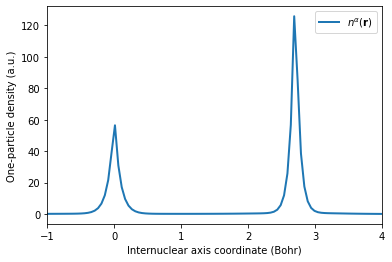

In [97]:
plt.plot(z, one_part_den, lw = 2, label = r'$n^\alpha(\mathbf{r})$')

plt.setp(plt.gca(), xlim = (-1,4))
plt.legend()

plt.xlabel(r'Internuclear axis coordinate (Bohr)')
plt.ylabel(r'One-particle density (a.u.)')

plt.show()

## Two-particle density

As indicated by the string arguments "alpha" and "beta" in the `get_two_particle_density` method, the spin densities can be determined individually, referring to the relation

$$
    n(\mathbf{r}_1, \mathbf{r}_2) = n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2) + 
    n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2) + n^{\beta\alpha}(\mathbf{r}_1, \mathbf{r}_2) + 
    n^{\beta\beta}(\mathbf{r}_1, \mathbf{r}_2)
$$

For a closed shell system, we have

\begin{align*}
n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2) & = n^{\beta\beta}(\mathbf{r}_1, \mathbf{r}_2) \\
n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2) & = n^{\beta\alpha}(\mathbf{r}_1, \mathbf{r}_2) 
\end{align*}

We will determine the two-particle density for electron 1 being poistioned at the carbon nucleus and electron 2 being positioned along the internuclear axis.

In [95]:
origin = np.zeros((n,3))

two_part_den_aa = vis_drv.get_two_particle_density(origin, coords, molecule, basis,
                                               scf_drv.density, 0, 'alpha', 'alpha')
two_part_den_ab = vis_drv.get_two_particle_density(origin, coords, molecule, basis,
                                               scf_drv.density, 0, 'alpha', 'beta')

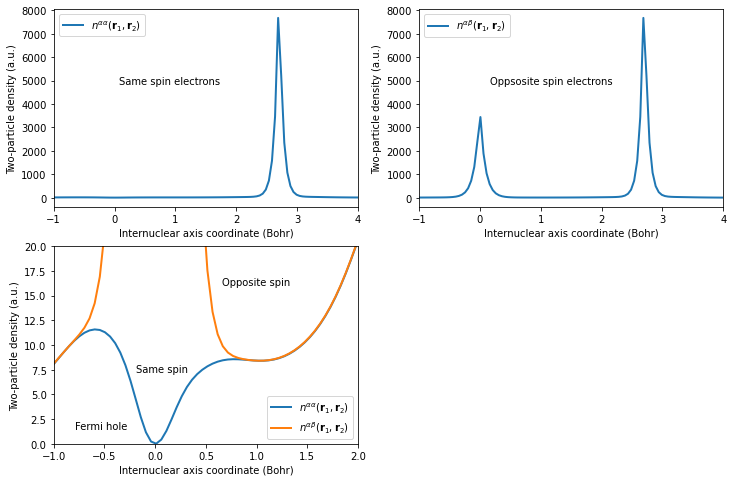

In [94]:
fig = plt.figure(figsize = (12,8))

plt.subplot(2, 2, 1)
plt.plot(z, two_part_den_aa, lw = 2, label = r'$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$')

plt.setp(plt.gca(), xlim = (-1,4))
plt.legend()

plt.figtext(0.2, 0.75, r'Same spin electrons')

plt.xlabel(r'Internuclear axis coordinate (Bohr)')
plt.ylabel(r'Two-particle density (a.u.)')

plt.subplot(2, 2, 3)
plt.plot(z, two_part_den_aa, lw = 2, label = r'$n^{\alpha\alpha}(\mathbf{r}_1, \mathbf{r}_2)$')
plt.plot(z, two_part_den_ab, lw = 2, label = r'$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$')

plt.setp(plt.gca(), xlim = (-1,2), ylim = (0,20))
plt.legend()

plt.figtext(0.22, 0.25, r'Same spin')
plt.figtext(0.15, 0.15, r'Fermi hole')
plt.figtext(0.32, 0.4, r'Opposite spin ')

plt.xlabel(r'Internuclear axis coordinate (Bohr)')
plt.ylabel(r'Two-particle density (a.u.)')

plt.subplot(2, 2, 2)
plt.plot(z, two_part_den_ab, lw = 2, label = r'$n^{\alpha\beta}(\mathbf{r}_1, \mathbf{r}_2)$')

plt.setp(plt.gca(), xlim = (-1,4))
plt.legend()

plt.figtext(0.63, 0.75, r'Oppsosite spin electrons')

plt.xlabel(r'Internuclear axis coordinate (Bohr)')
plt.ylabel(r'Two-particle density (a.u.)')

plt.show()